# Python for Data Analysis

This week topic is **Pandas** -- panel data structures. **Pandas** is a copycat of the *R* functionality, it is an attempt to bring *R* experience in Python. *Side note:* You will learn *R* starting week 7, and *R* is a copycat of *S* - it is a long story. 

Pandas is a really good copy of R and in some cases it might be concidered even better than R. If you learn Pandas well, R will be easy for you in the second part of our course. 

Pandas is the main tool for data analysis, so all your previous weeks were a preparation for this week topic. 

# Pandas

Package Pandas:
* provides easy to use data structures and many useful helper functions for data loading, cleanup and transformations. 
* is fast! (backed by numpy arrays) 
* contains high level data structures and manipulation tools for structured or tabular data. 
* provides a rich, high level interface making most common data tasks very concise and simple.  
* provides domain specific functionality, e.g. time series manipulation and easy handling of missing data (not present in NumPy)

There are three levels of data in Pandas:
1. Series: 1D labelled vector
2. DataFrame: 2D spreadsheet like structure
3. Panel: 3D labeled array, collection of DataFrames

As the panel is just a collection of DataFrames, we will talk about and use only the first two levels and two corresponding data structures introduced by Pandas: Series and DataFrame.

In [1]:
# first step is always the same - we need to load a package
import pandas as pd     # pandas package
import numpy as np      # numpy is always useful - load it too

It is traditional to abbreviate package Pandas as `pd`. It is just a commonly accepted convetion. Absolute majority examples you can find on the internet will use this abbreviation without any explanations. You are free to use a full name or any other abbreviations. However, a good code is a code that is easy to understand for other people. `pd` will make it easy for everyone.

## Pandas Series data structure

A Series is a one-dimensional object similar to a Numpy array. You can think about it as a column in a table.
A Series is a mutable structure. Series allows for a labelled index to be assigned to each item. As it is common in Python, by default, each item in a Series will receive an index label starting from 0.

In [2]:
obj = pd.Series([4, 7, -5, 3])  # create Pandas Series
obj

0    4
1    7
2   -5
3    3
dtype: int64

Similar to Numpy array -- all values in a Series are homogenious, that is, of the same type. Example above is a Series of integers. 

The left "column" with numbers 0 to 3 is not a real column of data but a list of indexes. We can use these indexes to extract or change data. Almost everything you know about one-dimensional numpy array indexing and slicing works here as well. Negative indexing does not work, however there is a method to go around it.

In [3]:
obj[0]         # indexing - get very first element

4

In [4]:
obj[1:]        # slicing - get all elements from second till the end

1    7
2   -5
3    3
dtype: int64

In [5]:
obj[[1,0,3]]   # array indexing - get elements with given indexes
               # beware extra square brackets we provide a list of integers as one index

1    7
0    4
3    3
dtype: int64

In [6]:
obj[obj > 0]  # boolean indexing

0    4
1    7
3    3
dtype: int64

In [7]:
obj[0] = 99   # change value by index
obj

0    99
1     7
2    -5
3     3
dtype: int64

A Series is a collection of values and indexes -- this is similar to a dictionary, so we can extract each of these components individually. Note that there are no round brackets after the name -- these two examples are properties of the Series.

In [8]:
obj.values    # values

array([99,  7, -5,  3], dtype=int64)

In [9]:
obj.index     # index - it is a range from 0 to 3

RangeIndex(start=0, stop=4, step=1)

As you have seen before, a Series is mutable -- we can change any element of it. As a result, `values` of the Series are mutable as well.

In [10]:
obj.values[0] = 4   # change the very first value
obj

0    4
1    7
2   -5
3    3
dtype: int64

At the same time, indexes are not mutable -- we cannot change any index. However, we can replace all indexes.

In [11]:
# replace existing index by a new one
obj.index = ["first", "second", "third", "forth"]   
obj

first     4
second    7
third    -5
forth     3
dtype: int64

New indexes work the same way as old indexes, so we can extract or change values by using letters as they are new indexes. Original numerical indexes are not there but we still can use them -- range type index is always available.

In [12]:
obj["first"]      # get value for index "a"

4

In [13]:
obj[0]        # get the first value

4

In [14]:
obj[["first", "forth", "second"]]    # array indexing

first     4
forth     3
second    7
dtype: int64

The only difference between custom indexes and range-type indexes is slicing. Typical slicing from X to Y in Python is: *start on X and finish one step before Y*. It works with numbers, Python knows that one step before 4 means 3. Python cannot know what comes one step before a custom index. 

Custom index slicing works in *R-style*: start on the first given index and finish on the last given index.

In [15]:
obj["first":"third"]  # slicing by custom index

first     4
second    7
third    -5
dtype: int64

In [16]:
obj[0:2]        # "classical" slicing was one step shorter

first     4
second    7
dtype: int64

In [17]:
obj["third":]   # slicing "till the end" works the same

third   -5
forth    3
dtype: int64

You can assign your own indexes at the moment of creating the Series. Both types of indexing/slicing -- by range-type numbers and by custom indexes -- will be available to you.

In [18]:
obj = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])  # create Pandas Series
obj

d    4
b    7
a   -5
c    3
dtype: int64

Operations with Pandas Series work the same way as with Numpy arrays, as Series is an array inside with added "fancy" indexing.

In [19]:
obj * 10   # product of a Series and a number

d    40
b    70
a   -50
c    30
dtype: int64

Operations **between** Series work differently -- it takes in consideration both indexes and run operations pair-wise between the same indexes. Check the example below very carefully. We have two Pandas Series with state names as indexes and some values. Some indexes are the same, however they are in different order. One index is missing from the second Series.

In [20]:
# create two series - when we convert a dictionary to a series,
# a key becomes and index; and value becomes a value of a series

sdict = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj1 = pd.Series(sdict)
print(obj1)

print("======= nice breaker to split two outputs =======")

sdict = {'Oregon': 16000, 'Ohio': 35000, 'Texas': 71000}
obj2 = pd.Series(sdict)
print(obj2)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
======= nice breaker to split two outputs =======
Oregon    16000
Ohio      35000
Texas     71000
dtype: int64


In [21]:
obj1 + obj2   # do summation

Ohio       70000.0
Oregon     32000.0
Texas     142000.0
Utah           NaN
dtype: float64

We got a summation of elements with the same indexes. Elements were match not by position as Numpy array would do but by the index regardless the position.

Value for index `Utah` happens to be `NaN` -- *Not a Number*. It is a special value indicating a missing value, like *nothing*. Numerical value with index `Utah` exists in the first Series but not in the second. Hence we get a summation of the number and *nothing* -- the result is always *nothing*. Later we will discuss treatments of missing values.

## Pandas DataFrame

The DataFrame is a special data structure for storing "real-life" data. It is very common to have a mix of different information in different columns: name, age, address, weight, height, income, eyes colour, income. Pandas DataFrame was designed to be similar to the R dataframe structure. Nowadays you can meet dataframes in different applications.

A DataFrame represents a tabular, spreadsheet-like data structure containing an ordered collection of columns, each of which can be a different value type  (numeric, string, boolean, etc.) The easiest way to think about a DataFrame is a collection of Pandas Series -- each column is a Series. The data inside each column is homogenious, that is, of the same type, but different columns might have different types of data.

The DataFrame has both a row and column index. 

In [22]:
obj = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])  # create Pandas Series
df = pd.DataFrame(obj, columns=['a'])     # create a data frame from a Series
df

,a
d,4
b,7
a,-5
c,3


The key difference between a Series and one-column DataFrame is a column name. DataFrame always has a column name, while Series has no columns at all.

### Creating DataFrames

The DataFrame can be created from many different data structures:

In [23]:
# from the nested list - every small list becomes a row
df = pd.DataFrame([["a", 3], ["b", 7], ["c", 9]], columns=["a", "b"])
df

,a,b
0,a,3
1,b,7
2,c,9


In [24]:
# from the list-like structure
df = pd.DataFrame(range(5), columns=['a'])
df

,a
0,0
1,1
2,2
3,3
4,4


In [25]:
# from Numpy array
df = pd.DataFrame(np.random.randn(5,3))
df

,0,1,2
0,-0.080276,0.120679,1.134011
1,0.254455,-1.208936,0.820566
2,0.453723,-1.621018,0.616030
3,-0.445858,-0.022374,-1.074210
4,2.052586,-0.889269,-1.570177


In [26]:
# from the dictionary
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [27]:
# more complex example of using a dictionary
# we provide a custom index for rows and four column names - this is a mismatch to the data
# as a result, we get an extra column with no data
df = pd.DataFrame(data, columns=['year','state','pop','debt'],
                  index=['one', 'two', 'three', 'four', 'five'])
df    

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


We can extract indexes for rows and for columns, and actual values -- there are a lot of similarity to Series.

In [28]:
df.index    # array of indexes for rows

Index(['one', 'two', 'three', 'four', 'five'], dtype='object')

In [29]:
df.columns  # array of indexes for columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [30]:
df.values   # 2D array of all values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, nan],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan]], dtype=object)

Array of values does not make much sense or practical value for our data as there are different data types in different columns, so the aggregated array of values was converted to data type "object". 

It is more common and more useful to extract and change or aggregate individual columns from the DataFrame. We use indexing for that and it is a bit more complex than indexing for two-dimensional Numpy arrays.

### Indexing and slicing DataFrames

A DataFrame might be viewed as a collection of Series of the same length. One Series makes one column. So, columns are primary interests for us. 

*Side note:* very often columns in a dataframe are called *variables*, the same as variables in Python. This notation comes from statistics. DataFrame `df` is a variable in programming sense, and every column in it is a variable in statistical sense. This is confusing but it is what it is.

In [31]:
df    # remind our dataframe structure

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


There are many ways to extract values from the DataFrame. Here are just some examples. Please pay attention to the data structure for extracted values

In [32]:
df.year      # so called dot-notation to extract a column

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [33]:
df["year"]   # index by column name

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [34]:
df[["year", "pop"]]  # index by array of column names

,year,pop
one,2000,1.5
two,2001,1.7
three,2002,3.6
four,2001,2.4
five,2002,2.9


Using numerical index with DataFrame does not work directly (with squared brackets). There are special methods for that. However, slicing for numerical indexes works but it works for rows!

In [35]:
df[1:3]   # get rows from index 1 to index 2 (one step before 3)

,year,state,pop,debt
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN


Another interesting feature is indexing with an array of booleans. Again, it will be applied not to the columns but to the rows. It is not indexing but *filtering* of the data -- we select what rows to keep.

In [36]:
df[df.year >= 2001]

,year,state,pop,debt
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


DataFrame indexer methods for indexing and slicing: `.at` and `.iat` to extract individual values; `.loc` and `.iloc` to extract ranges of data. Methods with `i` works for an integer index, without -- for names and boolean indexes. Overall, this type of indexing is very similar to array indexing (and slicing) -- first element for row, then comma, then element for column. All numerical indexes start from zero.

In [37]:
df.iat[3,1]   # row number 4 and column number 2

'Nevada'

In [38]:
df.at["four", "state"]  # row "four", column "state"

'Nevada'

In [39]:
df.iloc[3,1]  # the same as before as we don't ask for a slice

'Nevada'

In [40]:
df.iloc[3:,1:]  # a slice of the dataframe

,state,pop,debt
four,Nevada,2.4,NaN
five,Nevada,2.9,NaN


In [41]:
df.loc["three":"four", ["state", "pop"]]  # slicing by names

,state,pop
three,Ohio,3.6
four,Nevada,2.4


In [42]:
df.loc[df.year >= 2001, ["state", "pop", "year"]] # slicing by boolean and names

,state,pop,year
two,Ohio,1.7,2001
three,Ohio,3.6,2002
four,Nevada,2.4,2001
five,Nevada,2.9,2002


Another method is `.take()`. It takes values for selected indexes along selected axis.

In [43]:
df.take([3,2,1], axis = 1)   # take columns 3, 2 and 1 for all rows

,debt,pop,state
one,NaN,1.5,Ohio
two,NaN,1.7,Ohio
three,NaN,3.6,Ohio
four,NaN,2.4,Nevada
five,NaN,2.9,Nevada


In [44]:
df.take([3,2,1], axis = 0)   # take rows 3, 2 and 1 for all columns

,year,state,pop,debt
four,2001,Nevada,2.4,NaN
three,2002,Ohio,3.6,NaN
two,2001,Ohio,1.7,NaN


### Add, change and remove columns / values

It is very easy to create an extra column -- you just name it. If there is no such column name in the DataFrame, a new column will be created.

In [45]:
# create a dataframe with an extra column
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

# add an extra column name
df = pd.DataFrame(data, columns = ['state', 'year', 'pop', 'debt'], index = ['one', 'two', 'three', 'four', 'five'])
df

,state,year,pop,debt
one,Ohio,2000,1.5,NaN
two,Ohio,2001,1.7,NaN
three,Ohio,2002,3.6,NaN
four,Nevada,2001,2.4,NaN
five,Nevada,2002,2.9,NaN


In [46]:
# add new column by index name and fill it by a number
df['new_column'] = 5
df

,state,year,pop,debt,new_column
one,Ohio,2000,1.5,NaN,5
two,Ohio,2001,1.7,NaN,5
three,Ohio,2002,3.6,NaN,5
four,Nevada,2001,2.4,NaN,5
five,Nevada,2002,2.9,NaN,5


In [47]:
# add new column by index name and fill it by a list
df['new_column2'] = range(5)
df

,state,year,pop,debt,new_column,new_column2
one,Ohio,2000,1.5,NaN,5,0
two,Ohio,2001,1.7,NaN,5,1
three,Ohio,2002,3.6,NaN,5,2
four,Nevada,2001,2.4,NaN,5,3
five,Nevada,2002,2.9,NaN,5,4


We cannot use *dot-notation* to create a column. The dot indicates a property of the DataFrame but our DataFrame does not have (yet!) property `new_column2`.

Assigning new values to the existing columns is the same as creating columns but we just use existing names and/or indexes. **Reminder:** DataFrames are mutable -- we can change absolutely everything in them.

In [48]:
# changing existing column by index name and fill it by a Numpy array
df['new_column2'] = np.arange(2,12,2)
df

,state,year,pop,debt,new_column,new_column2
one,Ohio,2000,1.5,NaN,5,2
two,Ohio,2001,1.7,NaN,5,4
three,Ohio,2002,3.6,NaN,5,6
four,Nevada,2001,2.4,NaN,5,8
five,Nevada,2002,2.9,NaN,5,10


In [49]:
# we can use dot-notation to assign new values to existing columns
df.new_column = range(5)
df

,state,year,pop,debt,new_column,new_column2
one,Ohio,2000,1.5,NaN,0,2
two,Ohio,2001,1.7,NaN,1,4
three,Ohio,2002,3.6,NaN,2,6
four,Nevada,2001,2.4,NaN,3,8
five,Nevada,2002,2.9,NaN,4,10


All methods to extract values from the DataFrame can be used to change values.

In [50]:
# set new values to column 1
df.iloc[:,1] = 2023
df

,state,year,pop,debt,new_column,new_column2
one,Ohio,2023,1.5,NaN,0,2
two,Ohio,2023,1.7,NaN,1,4
three,Ohio,2023,3.6,NaN,2,6
four,Nevada,2023,2.4,NaN,3,8
five,Nevada,2023,2.9,NaN,4,10


In [51]:
# set new values to some rows in column "debt"
df.loc[df["pop"] > 2, "debt"] = 0
df

,state,year,pop,debt,new_column,new_column2
one,Ohio,2023,1.5,NaN,0,2
two,Ohio,2023,1.7,NaN,1,4
three,Ohio,2023,3.6,0,2,6
four,Nevada,2023,2.4,0,3,8
five,Nevada,2023,2.9,0,4,10


If you replace a slice of the DataFrame with another "collection" of values, it is very important to match the shape of the slice -- that is, to have the same number of rows and columns.

In [52]:
val = np.random.random((3,2))
df.iloc[2:, 3:5] = val
df

,state,year,pop,debt,new_column,new_column2
one,Ohio,2023,1.5,NaN,0.000000,2
two,Ohio,2023,1.7,NaN,1.000000,4
three,Ohio,2023,3.6,0.425995,0.290477,6
four,Nevada,2023,2.4,0.73353,0.267782,8
five,Nevada,2023,2.9,0.107403,0.298832,10


To delete the column we can use a command `del` which removes any object and the column is an object in the collection of columns (DataFrame). This method works for columns only -- not for rows.

In [53]:
del df["new_column"]
df

,state,year,pop,debt,new_column2
one,Ohio,2023,1.5,NaN,2
two,Ohio,2023,1.7,NaN,4
three,Ohio,2023,3.6,0.425995,6
four,Nevada,2023,2.4,0.73353,8
five,Nevada,2023,2.9,0.107403,10


Another approach is to "drop" some rows or columns from the data frame. You can drop along any axis. The default axis is 0, so by default the method looks indexes in row names

In [54]:
# drop two rows
df.drop(['two', 'four'])

,state,year,pop,debt,new_column2
one,Ohio,2023,1.5,NaN,2
three,Ohio,2023,3.6,0.425995,6
five,Nevada,2023,2.9,0.107403,10


In [55]:
# explicitly name the axis for columns and drop the column 
df.drop('new_column2', axis = 1)

,state,year,pop,debt
one,Ohio,2023,1.5,NaN
two,Ohio,2023,1.7,NaN
three,Ohio,2023,3.6,0.425995
four,Nevada,2023,2.4,0.73353
five,Nevada,2023,2.9,0.107403


Method `.drop()` creates a new DataFrame that is a copy (not reference) of the original one.

## Data manipulation and analysis

There are two important functionalities available in Pandas for data manipulations and data analysis available in other programming languages for data analysis (like SQL and R): **join/merge** and **groupby**.

### Join/merge

It is a very common situation when we have several DataFrame with somewhat related data. *Join/merge* functionality allows to combine two DataFrames on one more *key* -- common variables (common columns).

In [56]:
# prepare the data
left_df = pd.DataFrame({'key': range(5), 'left_value': ['a', 'b', 'c', 'd', 'e']})
right_df = pd.DataFrame({'key': range(2, 8), 'right_value': ['f', 'g', 'h', 'i', 'j', 'k']})

print(left_df)
print("==========================")  # just a separator for a bettwe presentation
print(right_df)


   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e
   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j
5    7           k


Two DataFrames above have a common column `key` with compatible and sometimes overlapping values. That indicates these two DataFrames are related and it might be beneficial to combine them together -- to merge (join) them.

There are four different approaches to joining data:
* **left** use only keys from the left DataFrame
* **right** use only keys from the right DataFrame
* **inner** use an intersection of keys from both DataFrames
* **outer** use a union of keys from both DataFrames

In [57]:
# left join - we keep all information from left_df and add matching information from right_df
pd.merge(left_df, right_df, on = "key", how = "left")

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


In [58]:
# Right join - we keep all information from right_df and add matching information from left_df
pd.merge(left_df, right_df, on = "key", how = "right")

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j
5,7,NaN,k


In [59]:
# Inner join - we keep all only information for overlapping values of key from both dataframes
pd.merge(left_df, right_df, on = "key", how = "inner")

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


In [60]:
# Outer join - we keep all information from both dataframes
pd.merge(left_df, right_df, on = "key", how = "outer")

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j
7,7,NaN,k


Join or merge makes a "smart" combination of two DataFrames. There is an other way to connect multiple DataFrames (more than two). It is `pd.concat()` function. It combines rows or columns in a more "mechanical" way without too much thinking about the meaning of the data. In some situations, this function is OK to use; in other situations, it might be wrong to use it.

In [61]:
# default concatination along axis 0 - combine rows
pd.concat([left_df, right_df])

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


In [62]:
# concatination along axis 1 - combine columns
pd.concat([left_df, right_df], axis = 1)

,key,left_value,key,right_value
0,0.0,a,2,f
1,1.0,b,3,g
2,2.0,c,4,h
3,3.0,d,5,i
4,4.0,e,6,j
5,NaN,NaN,7,k


### Groupping data

This functionality is used to organise data in some meaningful groups and then apply a desired operations for each group independently. For example, you have data about income levels for different people. And these data has extra varaible -- gender. Then you can group the data by gender for males and females and get an average income for each group to answer the question if there is a pay gap between males and females.

Groupping is one of the most important tools for data analysis when we have a categorical variable in the data that creates some meaningful groups or categories in the data.

In [63]:
# Read in the data from csv-file stored in the working directory
mtcars = pd.read_csv("mtcars.csv")

# check first 5 rows of the data
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [64]:
# check the overal size of the data
mtcars.shape

(32, 12)

Data set is not too big. It has 12 variables (columns) and 32 observations (rows). Data contain an information about technical parameters of some cars. 

We can do some analysis for the full data set. 

In [65]:
# get average fule consumption for cars in the data set measured as 
# mile-per-gallon (US-style, larger number means better fuel economy)
mtcars.mpg.mean()

20.090624999999996

Average fuel consumption is 20 miles per gallon

In [66]:
# get average for all variables (columns)
mtcars.mean()

C:\Users\bogomolt\AppData\Local\Temp/ipykernel_11224/2234312883.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mtcars.mean()


mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

The result might not be always meaningful or its meaning might be not straightforward. So you should think very carefully before applying any function and then making an interpretation. You get the number but what does it mean? 

For example, variable `am` represents a type of transmission: automatic transmission is coded as 0, manuals as 1. "Average" transmission makes no sense. However, with this encoding the number we got has a meaning. Value 0.406 means that 40.6% of cars in the data set have manual transmission. You can check that:

In [67]:
# get the number of car with manual transmission (code 1) and 
# divide by the total number of cars
(mtcars.am == 1).sum() / mtcars.shape[0] * 100

40.625

Variable `model` is categorical (it is a string) but it does not create any meaningful groups as all values are unique. All other variables are numerical. However, some of then have a very limited variability, so they can be treated as categorical variables. 

For example -- variable `cyl`, number of cylinders in the engine. There are only three possible values: 4 cylinders, 6 cylinders and 8 cylinders. So, we can use this variable to group the data into three distinct groups by the number of cylinders and then compare an average fuel consumption between these three groups.

In [68]:
# group by number of cylinders
grouped_by_cyl = mtcars.groupby("cyl")

# get average fuel consumption
grouped_by_cyl.mpg.mean()

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

There were three groups created, so we get three average values for mile-per-gallon -- one for each group. It is easy to see that 4-cylinder cars have the best fuel economy, them make more miles per one gallon of fuel.

Very often this approach to data analysis is call *group-and-aggregate* as there are two steps: (1) group data by one or more variables; (2) apply some aggregation function. The example above used two lines to signify these two steps. However, it is possible to run it in one line by clever using of dot-notation:

In [69]:
mtcars.groupby("cyl").mpg.mean()

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

It is possible to group by more than one variable. Just remember that they should be categorical variables, or variables that can be treated as categorical (typically integer values). For example, grouping by the column `mpg` does not make sense.

In [70]:
# can group by more number of cylinders and by type of transmission
grouped_by_cyl_am = mtcars.groupby(["cyl","am"])

# compute statistics aggregated over groupings - note function agg()
grouped_by_cyl_am["mpg"].agg([np.mean, np.std])

mean       std
cyl am                     
4   0   22.900000  1.452584
    1   28.075000  4.483860
6   0   19.125000  1.631717
    1   20.566667  0.750555
8   0   15.050000  2.774396
    1   15.400000  0.565685

There are three groups by the number of cylinders and two groups by the type of transmission. Overall, there are six groups. So, we got six rows and two columns as we asked for two aggregation functions -- mean and standard deviation.

### Aggregation functions

All aggregation functions you know from Numpy are available in Pandas as well. Also, you can use functions from other packages, e.g. Numpy.

In [71]:
# get median values for two columns by using Pandas functionality
mtcars[["mpg", "hp"]].median()

mpg     19.2
hp     123.0
dtype: float64

In [72]:
# get the same median values by Numpy function
np.median(mtcars[["mpg", "hp"]], axis = 0)

array([ 19.2, 123. ])

In [73]:
# get the same median values by combination of Numpy function and apply() from Pandas
# more details on apply() will be provided a bit later
mtcars[["mpg", "hp"]].apply(np.median)

mpg     19.2
hp     123.0
dtype: float64

In [74]:
# count how many cars in each sub-group of cyl-am grouping
mtcars.groupby(["cyl","am"])["cyl"].count()

cyl  am
4    0      3
     1      8
6    0      4
     1      3
8    0     12
     1      2
Name: cyl, dtype: int64

There is a function that gives you a full set of descriptive statistics values at once -- all main aggregations. Use this tool cautiously. You get all possible numbers, however not all of them are meaningful for your data and reporting them would be a mistake. 

For example, mean for the type of transmission `am` is somewhat meaningful but standard deviations and quantiles are meaningless. You should not report them.

In [75]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Data visualisation might be considered as a type of aggregation. It is equally easy to produce some basic types of data visualisation.

<AxesSubplot:>

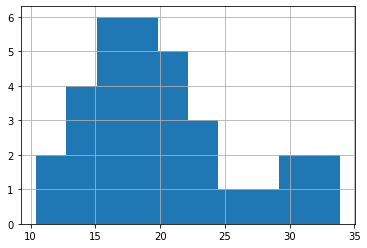

In [76]:
# Plot a histogram
mtcars["mpg"].hist()

<AxesSubplot:xlabel='hp', ylabel='mpg'>

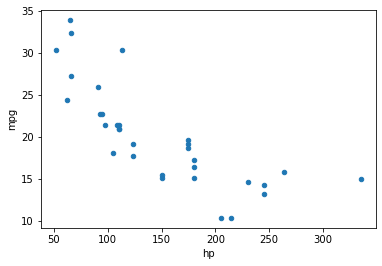

In [77]:
# plot a scatterplot
mtcars.plot.scatter("hp", "mpg")

By default, all aggregation functions work for columns. It is possible to use them for rows as well. However, very often it makes no sense at all as for our data set.

In [78]:
# get average values for each row
# the result makes no sense, these numbers mean absolutely nothing
mtcars.mean(axis = 1)

C:\Users\bogomolt\AppData\Local\Temp/ipykernel_11224/1740995025.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mtcars.mean(axis = 1)


0     29.907273
1     29.981364
2     23.598182
3     38.739545
4     53.664545
5     35.049091
6     59.720000
7     24.634545
8     27.233636
9     31.860000
10    31.787273
11    46.430909
12    46.500000
13    46.350000
14    66.232727
15    66.058545
16    65.972273
17    19.440909
18    17.742273
19    18.814091
20    24.888636
21    47.240909
22    46.007727
23    58.752727
24    57.379545
25    18.928636
26    24.779091
27    24.880273
28    60.971818
29    34.508182
30    63.155455
31    26.262727
dtype: float64

## Arithmetic between DataFrames and Series

The process of an automatic replication of the same object is called *broadcasting*. While we do calculations between arrays of different dimensionality or between DataFrame and Series, we broadcast as smaller object over the larger one. 

In [79]:
# broadcasting for Numpy array

# get a two-dimensional array
arr = np.arange(12.).reshape((3, 4))
print(arr)

# get a difference between a two-dimensional array and one-dimensional array
# that is, an original array and its first row
arr - arr[0]

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]


array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

As you should be able to see, one-dimensional array `[0,1,2,3]` was broadcasted along all rows of the original array -- repeated for each row. 

The same approach works for Pandas even better as DataFrames and Series do matching for row and column indexes.

In [80]:
# create a dataframe
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)), 
                     columns=list('bde'), 
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [81]:
# create a series as row
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [82]:
# do subtraction
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [83]:
# create another series - as a column
series = frame.iloc[:,1]
series

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [84]:
# do subtraction again and set axis explicitly
frame.sub(series, axis = 0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


Series were broadcasted along row and along columns.

## Reindexing

Indexes in DataFrames and Series are very important, so we need to be sure they are correct and change them when necessary. 

It is possible to destroy original index and create a new one.

In [85]:
# prepare series
obj = pd.Series(range(3), index=['a', 'b', 'c'])
obj

a    0
b    1
c    2
dtype: int64

In [86]:
# check index
obj.index

Index(['a', 'b', 'c'], dtype='object')

In [87]:
# set new index
obj.index = ['a', 'x', 'c']
obj

a    0
x    1
c    2
dtype: int64

Also, it is possible to re-arrange the existing index and values without changing indexes.

In [88]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'x'])
obj2

a    0.0
b    NaN
c    2.0
d    NaN
x    1.0
dtype: float64

Series gets indexes in the new order and gets some values for new indexes. If you what to have anything more meaningful than `NaN` for new values, you can do it.

In [89]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'x'], fill_value = -99)
obj2

a     0
b   -99
c     2
d   -99
x     1
dtype: int64

## Function mapping -- `apply()` function

You should already remember that the main power and benefit of Numpy and Pandas is vectorisation - an ability to process large data sets in one go, very quick and efficient. Both packages have special functions to support vectorisation.

If you need to run a custom function or a function that does not support vectorisation, you can use function `apply()`. It applies your function to a DataFrame and makes your function vectorised too. *Side note:* as this is not a true "native" vectorisation, an application would be not that quick as functions from Pandas package.

In [90]:
# create a dataframe
frame = pd.DataFrame(np.random.randn(4, 3), 
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-1.774064,1.294949,0.731349
Ohio,-0.336062,1.433509,-1.453459
Texas,-0.436958,1.410183,-0.457300
Oregon,-0.507203,2.243975,0.484609


In [91]:
# prepare a custom function
f = lambda x: x.max() - x.min()

# apply a custom function to every column of the dataframe
frame.apply(f)

b    1.438003
d    0.949026
e    2.184808
dtype: float64

As it is typical for most functions in Pandas, by default they work over each column in the DataFrame as columns are more important in data analysis. However, if it is required and if it is meaningful, we can apply our function to every row as well.

In [92]:
# apply function to every row
frame.apply(f, axis = 1)

Utah      3.069013
Ohio      2.886968
Texas     1.867483
Oregon    2.751177
dtype: float64

Another function from the same family is `applymap()`. It applies provided function element-wise -- not to rows or columns but to one element at a time.

In [93]:
# prepare a function to convert value to string with 2 decimal places
format2 = lambda x: '%.2f' % x 

# apply the custom function
frame.applymap(format2)

,b,d,e
Utah,-1.77,1.29,0.73
Ohio,-0.34,1.43,-1.45
Texas,-0.44,1.41,-0.46
Oregon,-0.51,2.24,0.48


## Read and write data

Last week you saw that loading mixed data in Numpy array is a pain as array expects homogeneous data. Pandas have special functions to load mixed data and automatically convert all variables in correct data type. Just run command `dir(pd)` and scroll to the section with a list of functions starting with `read_...()`. There are `read_clipboard()` to read data loaded in the clipboard from any application; `read_csv()` to read comma-delimited files; `read_sas()`, `read_spss()`, `read_sql()` to read data in all these formats; and many others. 

To write data you have to check methods for the DataFrame you want to write in to some other format. Try `dir(df)` assuming that you have the DataFrame `df` in memory. An alternative is to create and check a "dummy" DataFrame `dir(pd.DataFrame())`. Scroll to find a section with a list of functions starting with `to_...()`. All these functions will converted your DataFrame in to different formats.

Pandas "native" format to store and load data is **pickle**. It is quicker that any other formats available.

## Missing data

Very often we get data with missing values, that is, there are no values in some rows/columns. Obviously, we cannot do data analysis if there are no values. So, we can remove rows with missing information to make data nice and clean and good for analysis. However, you should be very careful. The row might have missing values in some columns and "normal" values in other columns. We will lose some information by removing the row. Information is always valuable for analysis and often expensive to get.

In [94]:
# prepare a dataframe with some missing values
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan

df_copy = df.copy()    # temp copy for testing

df

,0,1,2
0,0.998217,NaN,NaN
1,0.794150,NaN,NaN
2,0.218991,NaN,-0.090058
3,0.227470,NaN,0.361048
4,0.408283,-1.336690,-0.393607
5,0.413891,0.107694,-0.148400
6,1.279208,-0.319447,0.746239


In [95]:
# test if there are any missing values
# use function from Pandas
pd.isnull(df)

,0,1,2
0,False,True,True
1,False,True,True
2,False,True,False
3,False,True,False
4,False,False,False
5,False,False,False
6,False,False,False


In [96]:
# test if there are any missing values
# an alternative function from Pandas
pd.isna(df)

,0,1,2
0,False,True,True
1,False,True,True
2,False,True,False
3,False,True,False
4,False,False,False
5,False,False,False
6,False,False,False


This is an another set of potentially confusing functions. There is no difference at all between function `pd.isnull()` and `pd.isna()`. These functions are identical and you can use any of them. They are a "historical" artefact of Pandas package development.

In [97]:
# test if there are any NON-missing values
# use function from Pandas; pd.notna(df) does the same job
pd.notnull(df)

,0,1,2
0,True,False,False
1,True,False,False
2,True,False,True
3,True,False,True
4,True,True,True
5,True,True,True
6,True,True,True


We can drop rows with missing values. Technically this is easy, practically this is not always a right way to go.

In [98]:
# drop all rows with missing values
df.dropna()

,0,1,2
4,0.408283,-1.336690,-0.393607
5,0.413891,0.107694,-0.148400
6,1.279208,-0.319447,0.746239


In [99]:
# drop rows if they have 2 or more missing values
df.dropna(thresh=2)

,0,1,2
2,0.218991,NaN,-0.090058
3,0.227470,NaN,0.361048
4,0.408283,-1.336690,-0.393607
5,0.413891,0.107694,-0.148400
6,1.279208,-0.319447,0.746239


Alternatively, we can replace missing values by some numbers, for example by zeros or by mean value for each column. Both of them are possible strategies and both of them have some potential problems.

In [100]:
# use method from the dataframe properties and boolean indexing
# to replace all NA by zeros
df_copy[df.isnull()] = 0
df_copy

,0,1,2
0,0.998217,0.000000,0.000000
1,0.794150,0.000000,0.000000
2,0.218991,0.000000,-0.090058
3,0.227470,0.000000,0.361048
4,0.408283,-1.336690,-0.393607
5,0.413891,0.107694,-0.148400
6,1.279208,-0.319447,0.746239


In [101]:
# replace all NA by mean value for corresponding column
df.fillna(df.mean())

,0,1,2
0,0.998217,-0.516148,0.095044
1,0.794150,-0.516148,0.095044
2,0.218991,-0.516148,-0.090058
3,0.227470,-0.516148,0.361048
4,0.408283,-1.336690,-0.393607
5,0.413891,0.107694,-0.148400
6,1.279208,-0.319447,0.746239


Bottom line for the section on missing values: there is no good way to fix missing values. Some strategies might be slightly better than others in some particular situations.

Sometimes we don't need to do anything special about missing values as Pandas takes care about them automatically. For example, it is impossible to calculate mean for missing values, however function `mean()` removes them before calculations and we get a result.

In [106]:
# get mean value for each column
df.mean()

0    0.620030
1   -0.516148
2    0.095044
dtype: float64